# Tutorial 'QC, topographical analysis and segmentaton-free of Spot-based transcriptomics data'

In [1]:
%load_ext autoreload
%autoreload 2

## Make screen wider, add planktonpy folder to system path to enable import:

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import sys
import os

sys.path.append(os.path.join(os.path.abspath('.'),'../..'))

### data import:

In [2]:
import plankton.plankton as pl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def figure(width=6,height=6):
    plt.figure(figsize=(width,height))


In [3]:
um_p_px = 0.325

# Read coordinate/gene data from .csv file
coordinates = pd.read_csv('./data/in_situ_sequencing/coordinates.csv')
coordinates

Gene  Global_y_pos  Global_x_pos            Q   parentCell
0        FLT1   4909.911982   1190.493724  1190.493724  1190.493724
1        FLT1   4908.912407   1194.492023  1194.492023  1194.492023
2        JAG2   4852.936212   1614.313488  1614.313488  1614.313488
3       RSPO2   4940.898805   1634.304986  1634.304986  1634.304986
4       SPRY1   4982.880951   1759.251850  1759.251850  1759.251850
...       ...           ...           ...          ...          ...
494144    MET  11432.138303   9209.083692  9209.083692  9209.083692
494145  FGFR4  10289.624175   9292.048410  9292.048410  9292.048410
494146  FGFR4  11295.196539   9343.026730  9343.026730  9343.026730
494147   DTX1  13125.418209   9475.970194  9475.970194  9475.970194
494148   ETV1  13123.419059   9476.969769  9476.969769  9476.969769

[494149 rows x 5 columns]

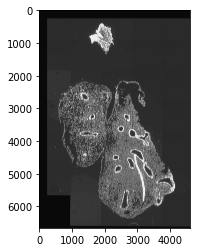

In [8]:
# Load staining image as .jpg:

bg = -plt.imread('background.jpg').mean(-1)
bg = (bg-bg.min())/(bg.max()-bg.min())

plt.imshow(bg,cmap='Greys')

In [9]:
# sdata.scatter_js() 

In [109]:
rands = np.random.rand(5000,2,)*np.array([coordinates.Global_x_pos.values.max(),coordinates.Global_y_pos.values.max()])

x = np.hstack([coordinates.Global_x_pos.values,rands[:,0]])
y = np.hstack([coordinates.Global_y_pos.values,rands[:,1]])

rand_genes = coordinates.Gene.values[np.random.randint(len(coordinates.Gene.unique()), size=(rands.shape[0]))]
g = np.hstack([coordinates.Gene.values,rand_genes])
g = np.hstack([coordinates.Gene.values,['noise']*rands.shape[0]])



In [4]:
sdata = pl.SpatialData(x_coordinates=x*um_p_px,
                       y_coordinates=y*um_p_px,
                       genes=g,
#                        pixel_maps={'DAPI':bg_map}
                      )

NameError: name 'x' is not defined

## ...and the stage is yours!

In [6]:
# Create a plankton-SpatialData object with the coordinates:

sdata = pl.SpatialData(
                        coordinates.Gene,
                        coordinates.Global_x_pos*um_p_px,
                        coordinates.Global_y_pos*um_p_px,
                        )

#show HTML representation:
sdata

g            x            y  gene_id
0        FLT1   386.910460  1595.721394       47
1        FLT1   388.209908  1595.396532       47
2        JAG2   524.651884  1577.204269       69
3       RSPO2   531.149120  1605.792112      107
4       SPRY1   571.756851  1619.436309      120
...       ...          ...          ...      ...
494144    MET  2992.952200  3715.444948       81
494145  FGFR4  3019.915733  3344.127857       46
494146  FGFR4  3036.483687  3670.938875       46
494147   DTX1  3079.690313  4265.760918       25
494148   ETV1  3080.015175  4265.111194       32

[494149 rows x 4 columns]

In [91]:
# inspect 'stats' info frame:

sdata.stats

counts  count_ranks  count_indices  gene_ids
AP000561     656           24            138         0
ARIH1       9550          132             10         1
ATP11A      2449           71             24         2
BCL2        3734           97            137         3
BMP5       13684          138             25         4
...          ...          ...            ...       ...
WNT2         114            3             89       137
WNT2B         17            0              4       138
WNT5A        792           30             88       139
WNT7B        993           35             13       140
WT1         2632           78              9       141

[142 rows x 4 columns]

<AxesSubplot:>

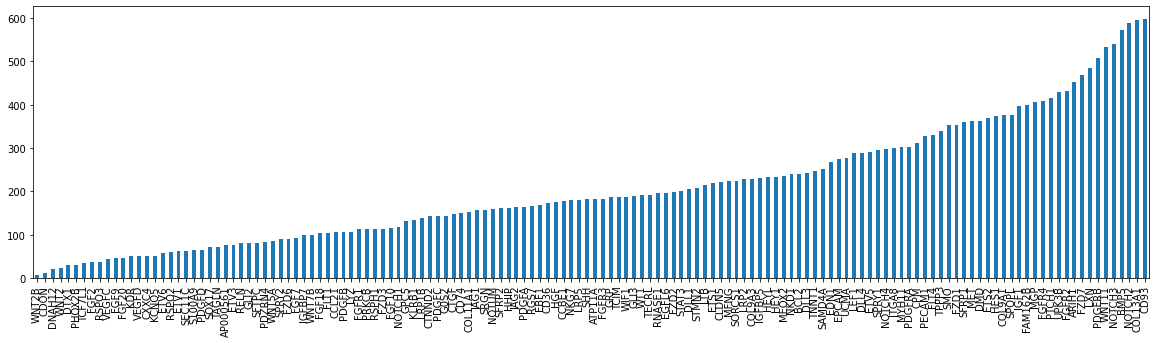

In [97]:
# Plot a representation of the gene counts in the data set:

plt.figure(figsize=(20,5))
sdata.counts.sort_values().plot.bar()

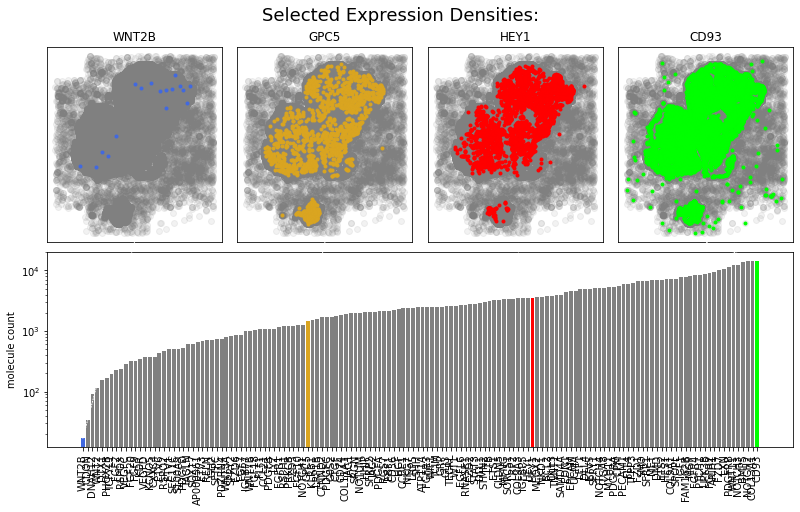

In [93]:
# Plot 'overview' data set summary:
sdata.plot_overview()

(<matplotlib.collections.PathCollection at 0x7f8a735b6bb0>, None, None)

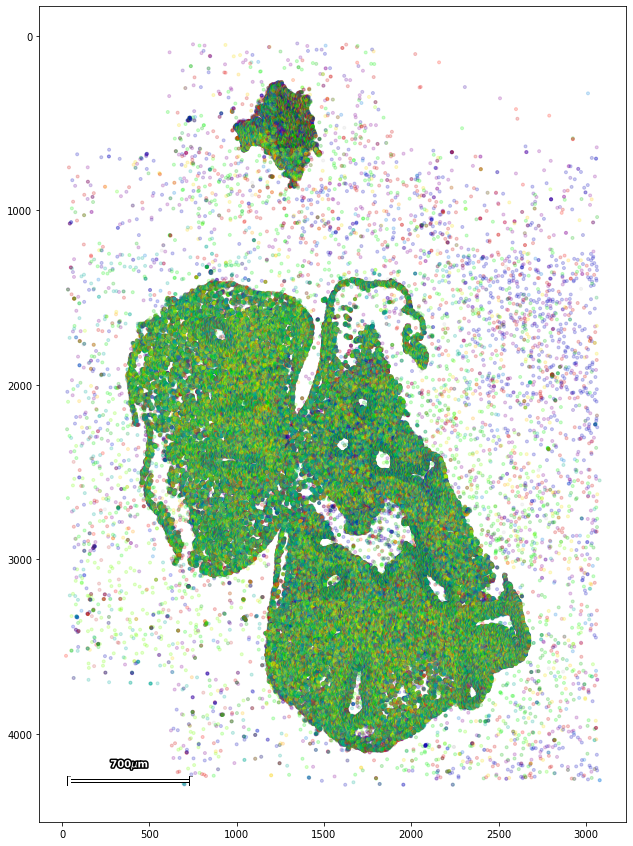

In [94]:
# use the 'scatter' function to get familiar with the data set:

plt.figure(figsize=(15,15))

sdata.scatter(alpha=0.2)

#### Adding a pixel map as background image:

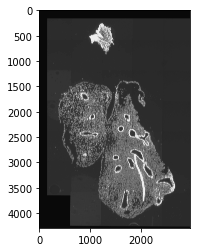

In [11]:
bg_map = pl.PixelMap(pixel_data=bg,
                     cmap='Greys',
                     px_p_um = 0.504/um_p_px)
bg_map.imshow()

# del bg

In [12]:
sdata = pl.SpatialData(
                        coordinates.Gene,
                        coordinates.Global_x_pos*um_p_px,
                        coordinates.Global_y_pos*um_p_px,
                        pixel_maps={'DAPI':bg_map}
                        )

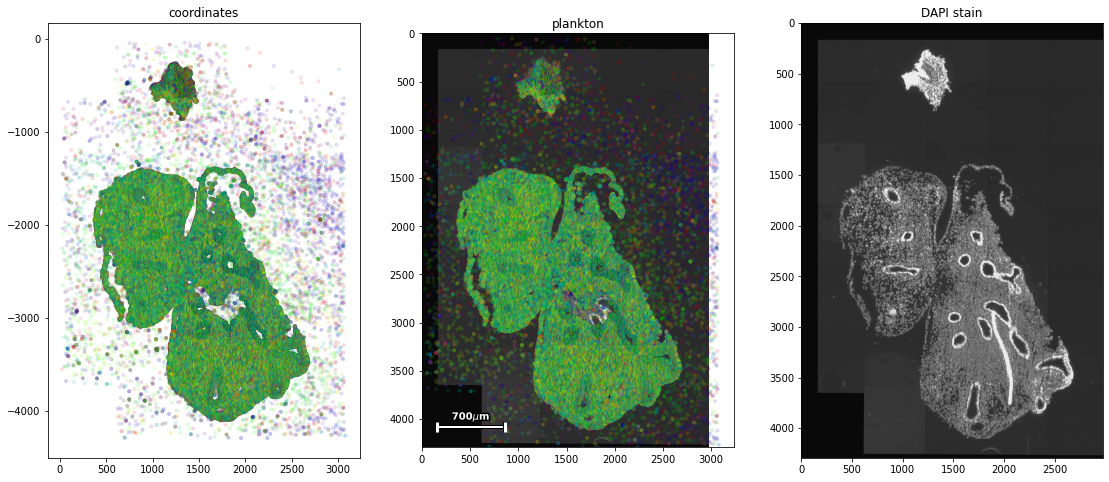

In [13]:
plt.figure(figsize=(19,8))

plt.subplot(1,3,1)
plt.title('coordinates')
plt.scatter(*sdata.coordinates[:,:].T*np.array([[1],[-1]]),c=sdata.obsc.c_genes[sdata.gene_ids],marker='.',alpha=0.1)

plt.subplot(1,3,2)
plt.title('plankton')
sdata.scatter(alpha=0.1)

ax=plt.subplot(1,3,3)
plt.title('DAPI stain')
bg_map.imshow(axd=ax)

In [14]:
sdata.pixel_maps['DAPI'].extent

(0.0, 4292.063492063492, 0.0, 2971.4285714285716)

#### basic slicing functionality:

(<matplotlib.collections.PathCollection at 0x7fec8bf100d0>, None, None)

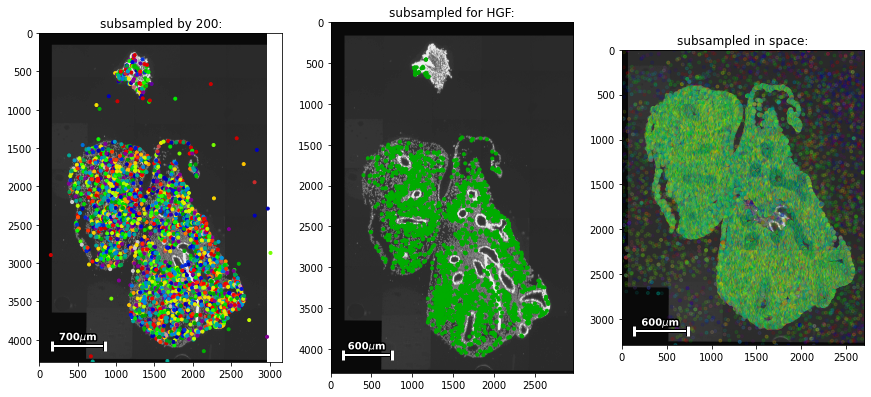

In [15]:
plt.figure(figsize=(20,7))


# Slice using array notation:
plt.subplot(1,4,1)
plt.title('subsampled by 200:')
sdata[::200].scatter()

# Subsample using boolean mask:
plt.subplot(1,4,2)
plt.title('subsampled for HGF:')
sdata[sdata.g=='HGF'].scatter()

# Subsample using spatial view:
plt.subplot(1,4,3)
plt.title('subsampled in space:')
sdata.spatial[100:2800,1000:].scatter(alpha=0.1)


## Task:

use pands.Series.isin to plot all genes that occur below 50 times in the sample. 

(<matplotlib.collections.PathCollection at 0x7fec8bdcdf70>,
 None,
 <matplotlib.legend.Legend at 0x7fec8be344c0>)

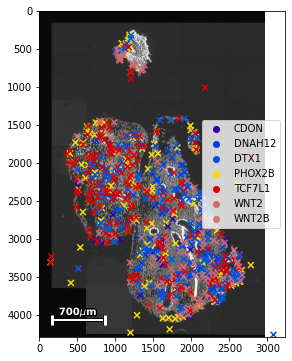

In [16]:
figure()
sdata[(sdata.counts<200)[sdata.gene_ids]].scatter(marker='x',legend=True)

## some basic statistical analysis using squidpy:

In [111]:
# Perform subsampling to reduce runtime (for the sake of this tutorial...)
prog_sample = sdata.stats.progressive_sample(1.5)

sdata = sdata[prog_sample]

In [18]:
from plankton.utils import hbar_compare

figure()
hbar_compare(sdata.stats,sdata_.stats,('raw','downsampled'))

NameError: name 'sdata_' is not defined

<Figure size 432x432 with 0 Axes>

In [ ]:
figure(15,5)
sdata.counts.sort_values().plot.bar()
sdata[prog_sample].counts.sort_values().plot.bar(color='r')

In [39]:
import squidpy as sq

# Compute neighborhood graph:
sq.gr.spatial_neighbors(sdata_,'spatial')


  0%|          | 0/1000 [00:00<?, ?/s]

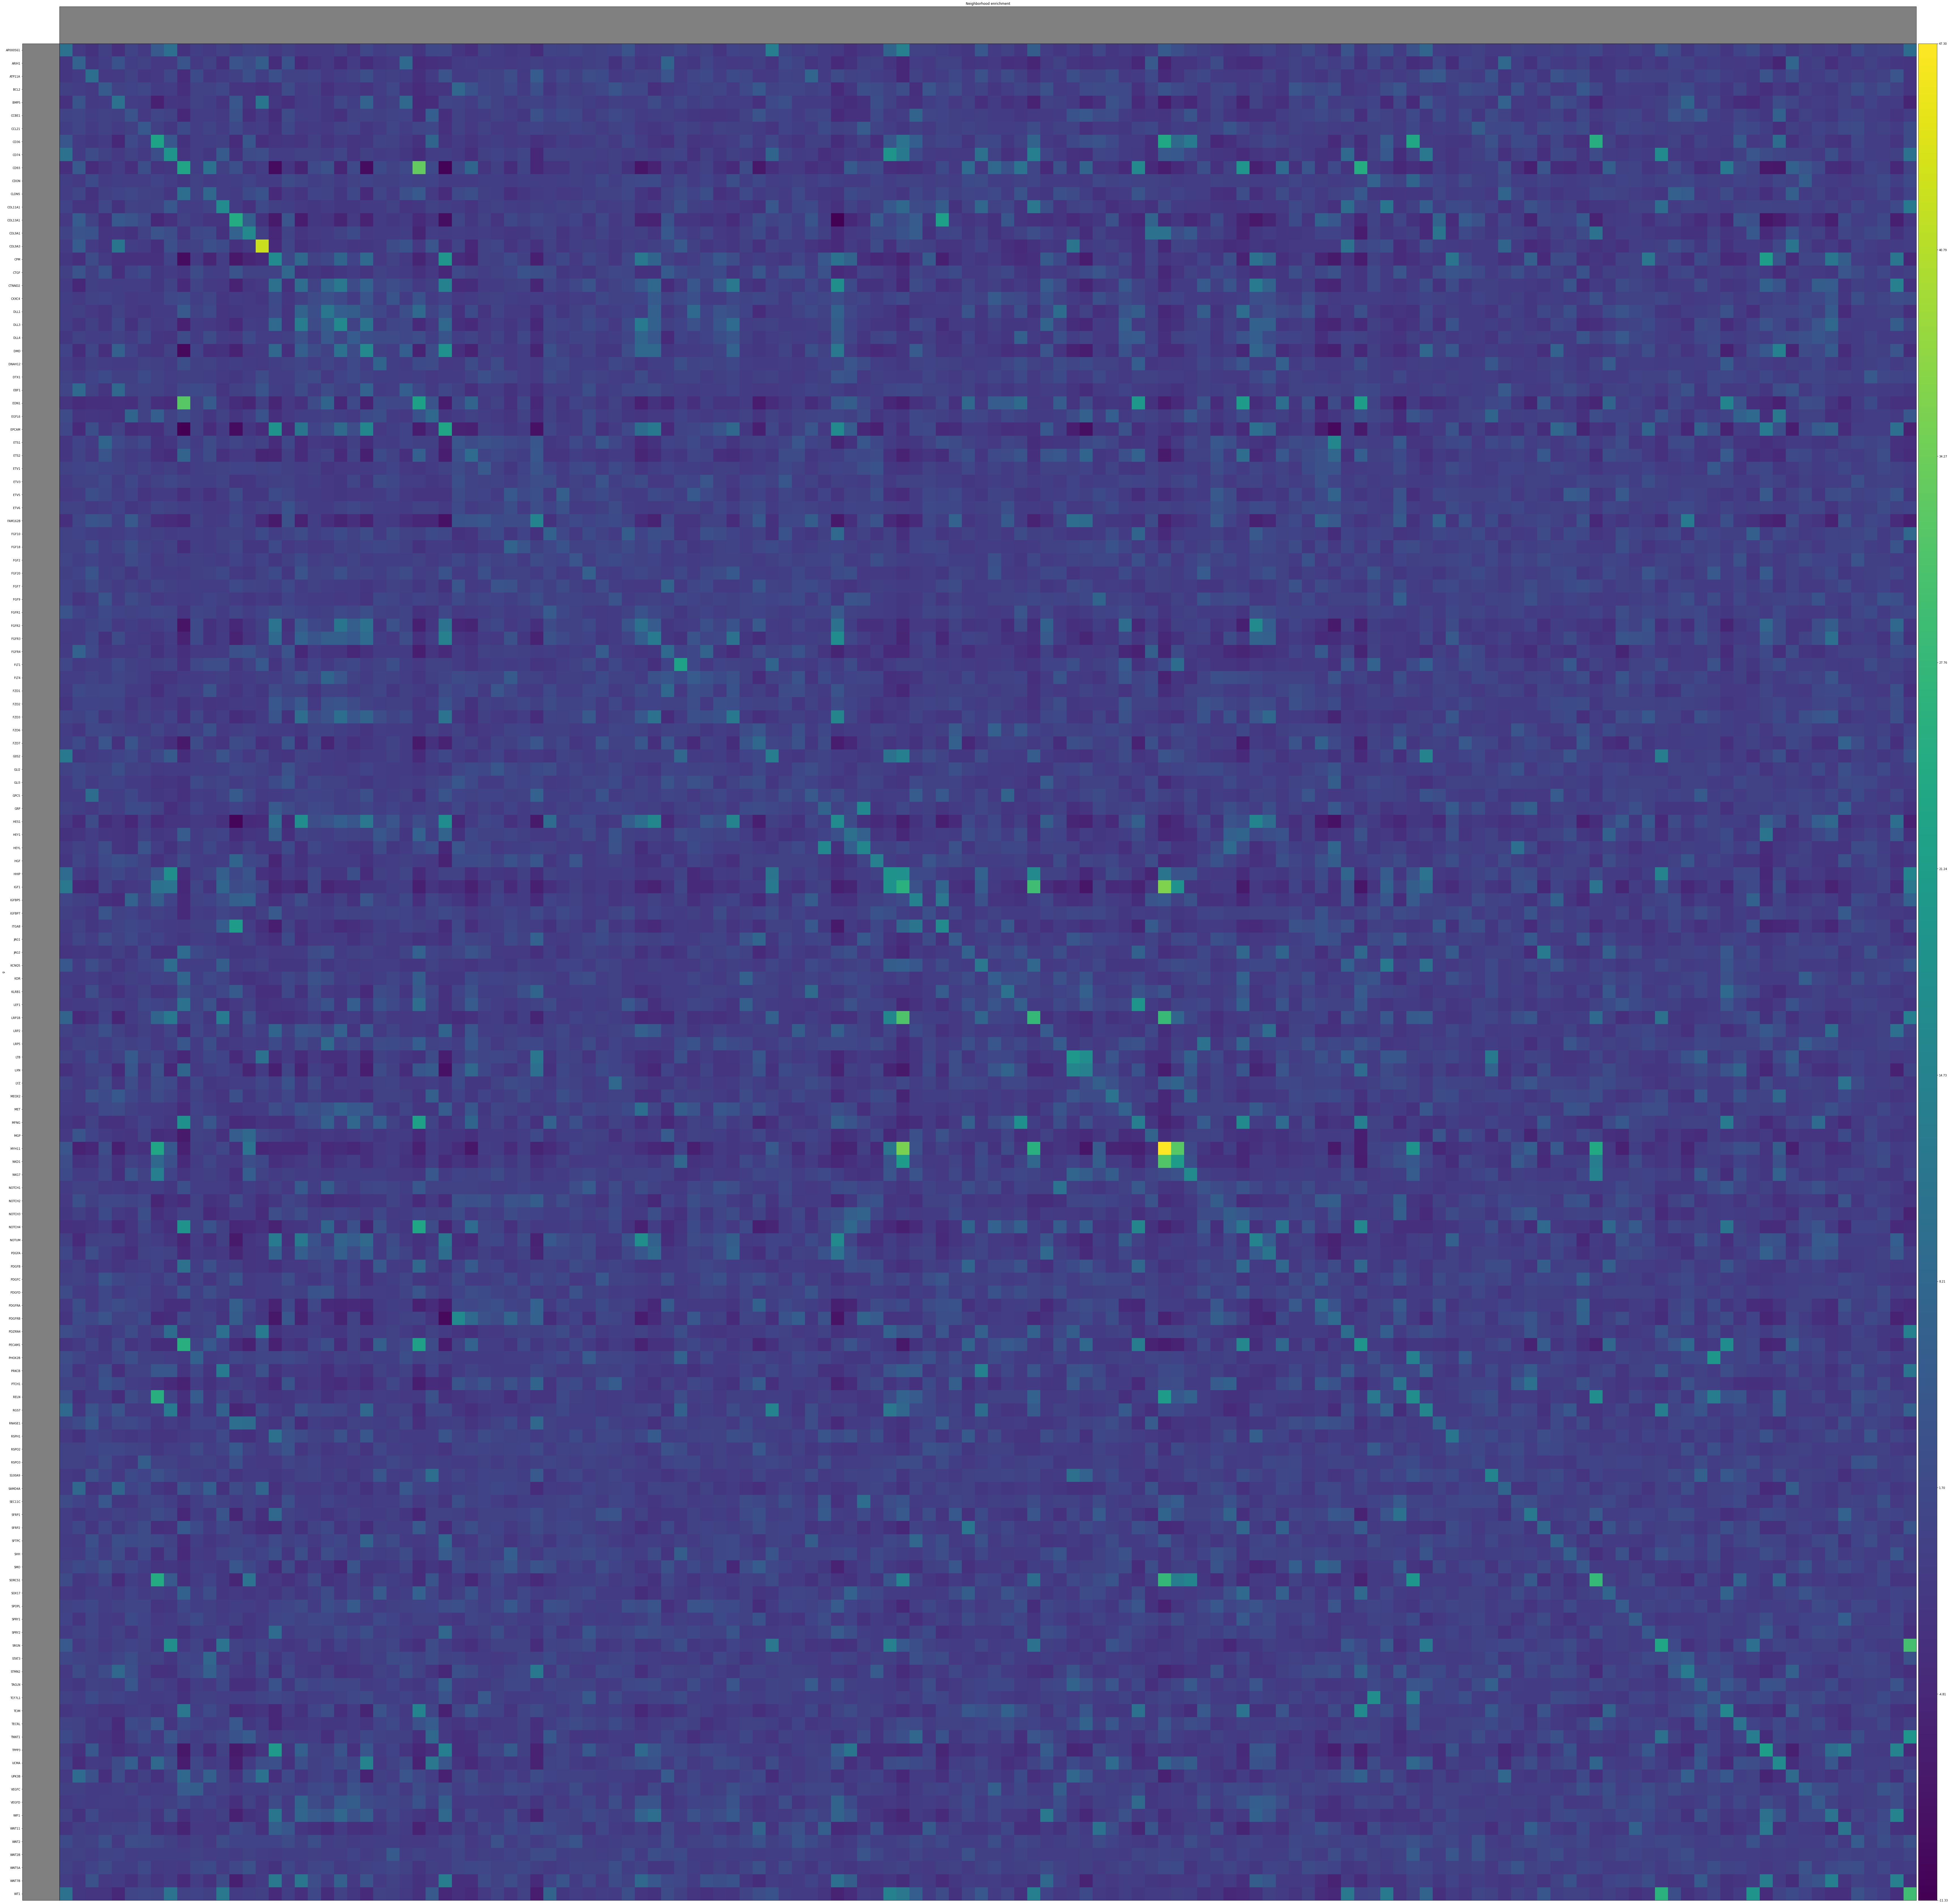

In [40]:

# Compute neighborhood enrichment through permutation:
sq.gr.nhood_enrichment(sdata_,'g')

sq.pl.nhood_enrichment(sdata_,'g')

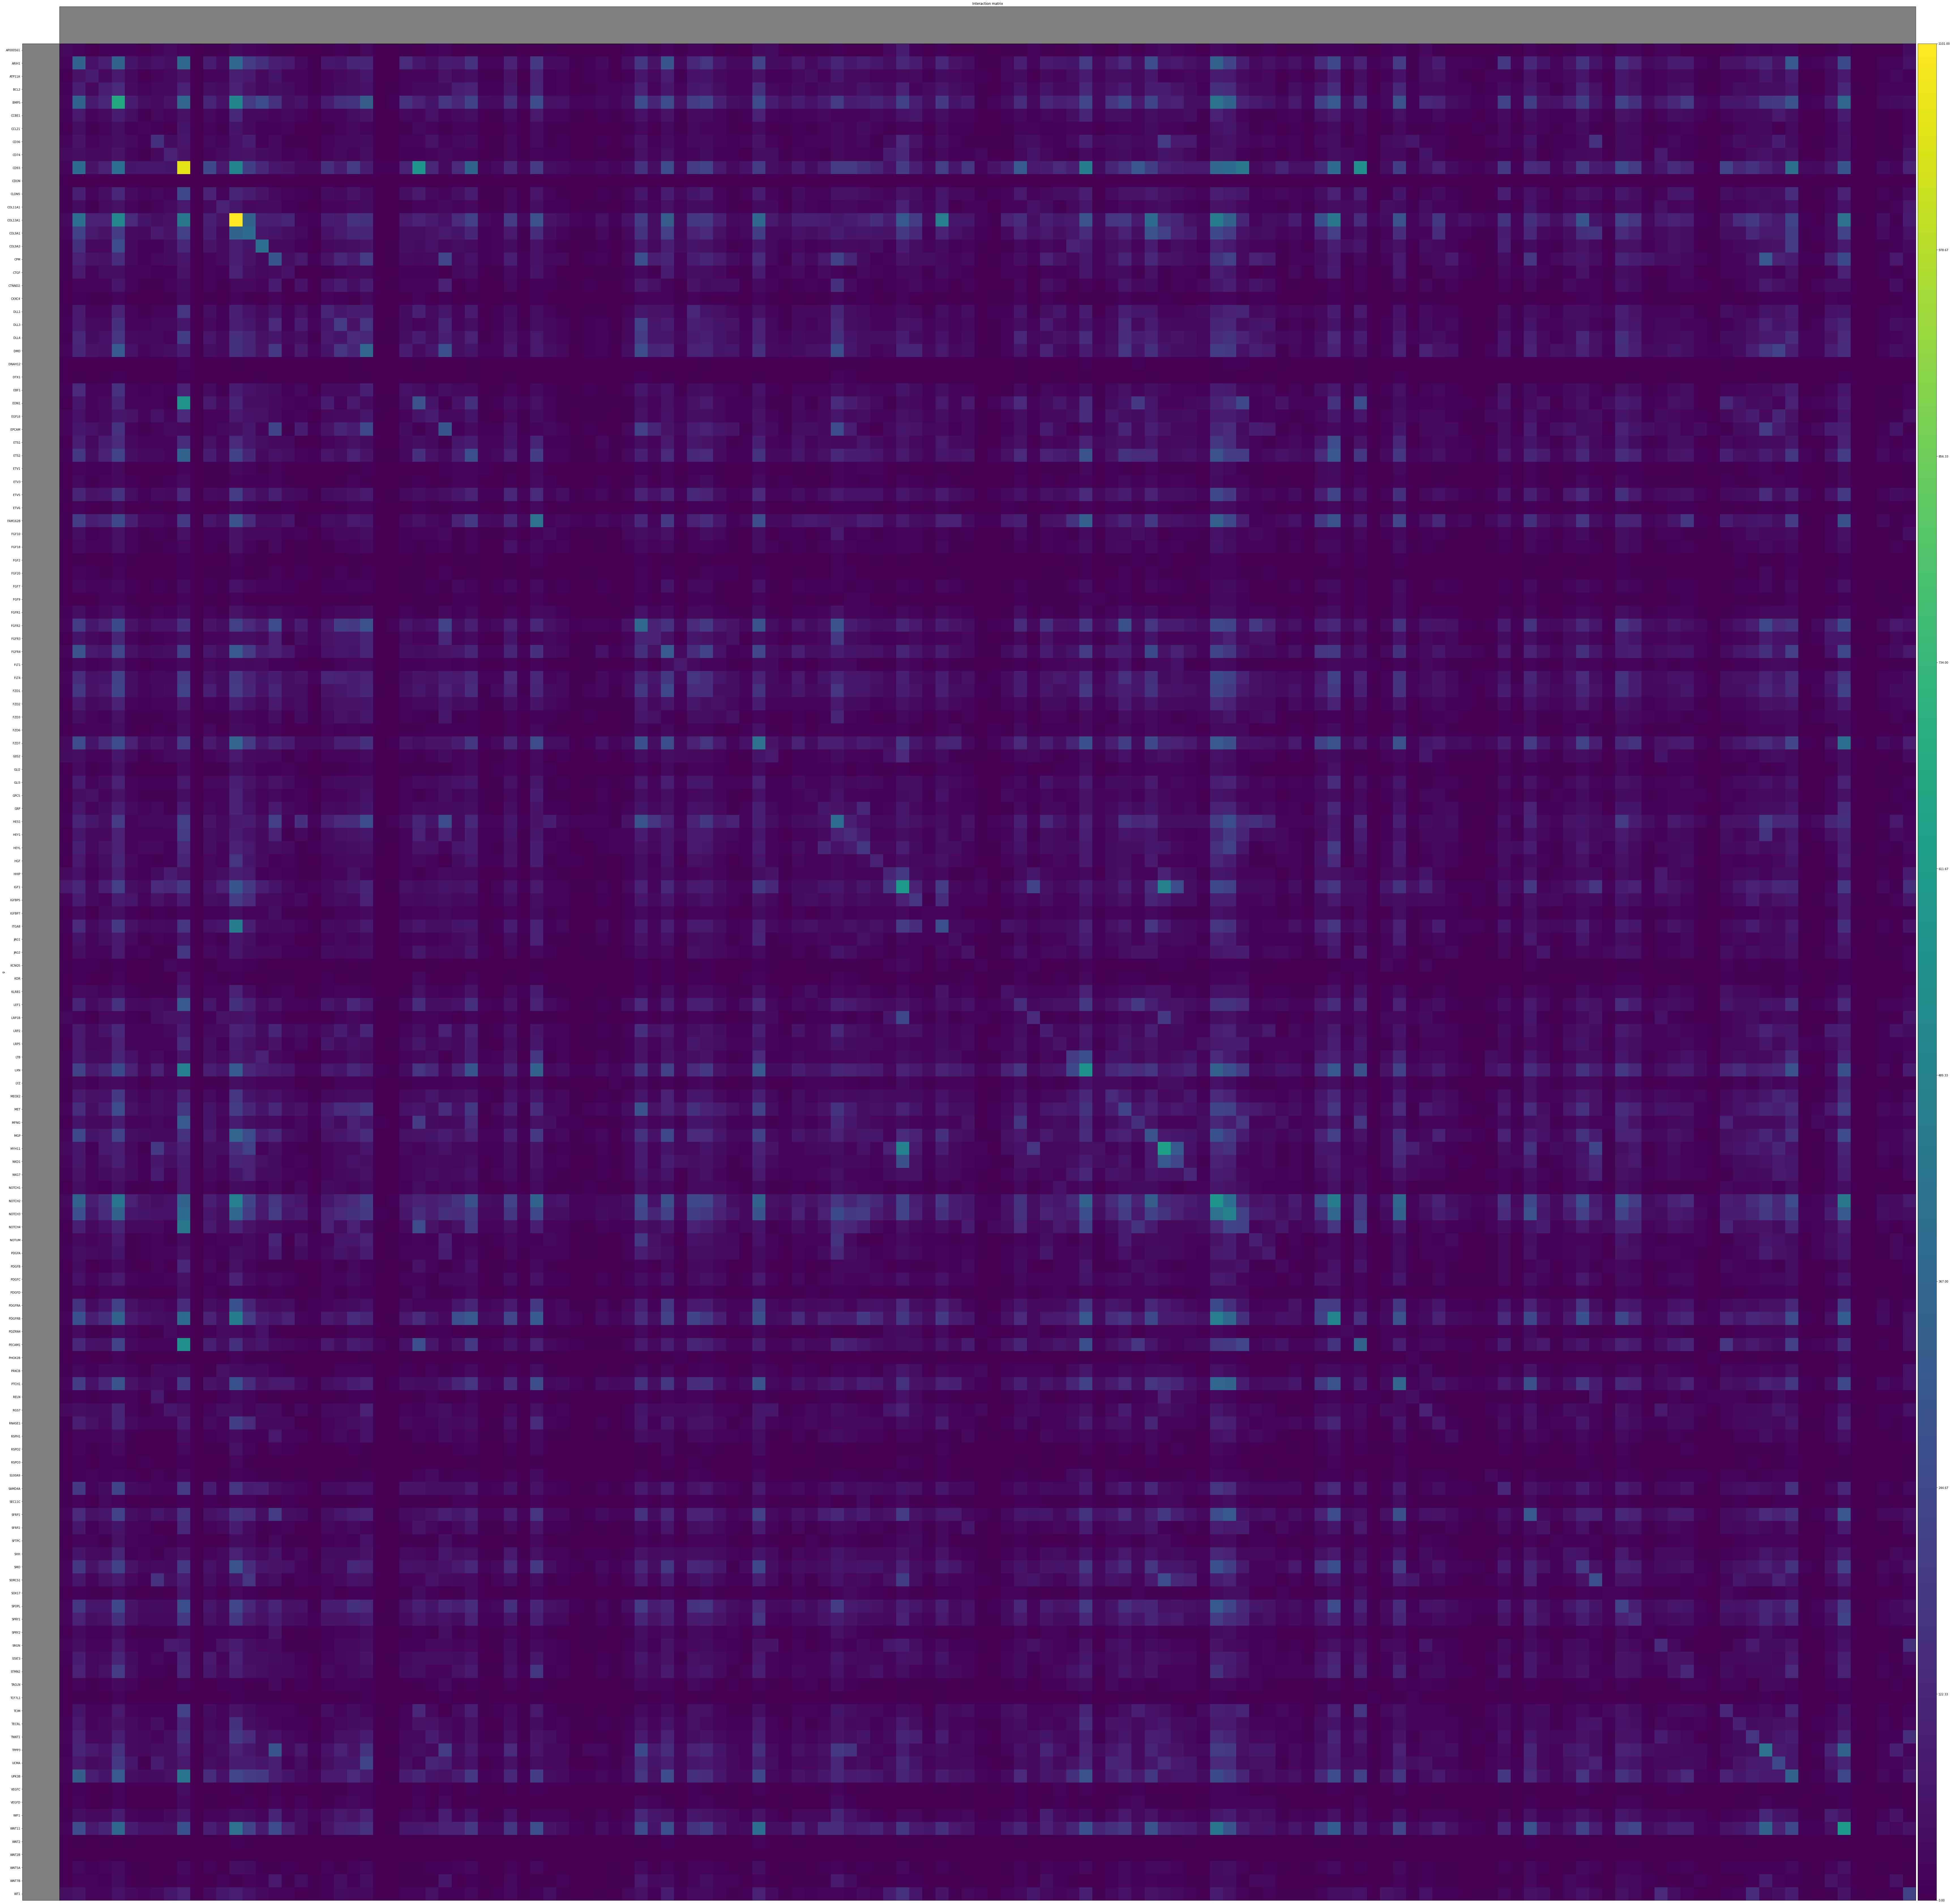

In [41]:
im=sq.gr.interaction_matrix(sdata_,'g')
sq.pl.interaction_matrix(sdata_,'g')

(<matplotlib.collections.PathCollection at 0x7fa371aa1640>, None, None)

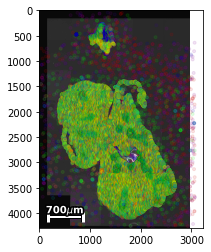

In [45]:
sdata[((sdata_.uns['g_interactions']>100)[22])[sdata.gene_ids]].scatter(alpha=0.1)
# import plankton
# isinstance(sdata.background, plankton.pixelmaps.PixelMap)

# type(sdata.background)

In [53]:
plt.style.use('default')
count_ratios = (sdata.counts**0.9/sdata.counts)

sample_mask = np.ones((len(sdata,)),dtype=bool)



for i,c in enumerate(count_ratios):
    sample_array = np.linspace(0,1,sdata.counts[i])
    np.random.shuffle(sample_array)
    sample_mask[sdata.gene_ids==i] = sample_array<c
    
sdata_downsampled = sdata[sample_mask]

<AxesSubplot:ylabel='counts'>

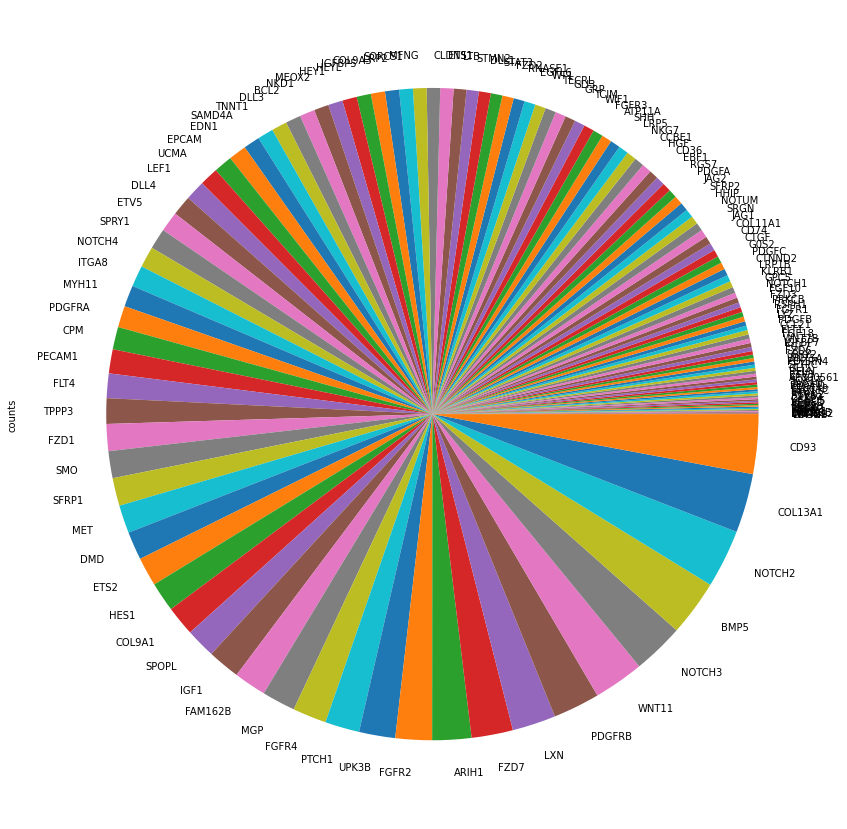

In [21]:
plt.figure(figsize=(15,15))
sdata.counts.sort_values().plot.pie()

(<matplotlib.collections.PathCollection at 0x7f8a725ef520>, None, None)

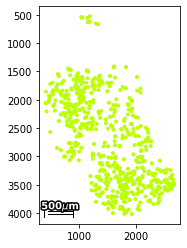

In [96]:
sdata[sdata.g=='NOTCH2'].scatter()

In [13]:
markers = {'mesenchymal':['COL1A2','COL1A3','COL6A3','ACTA2','PDGFR8','WT1',
                        'TSH22','CDH11','CCBE1','UNC5C','COL1A1','RSPO2','DCN'],
           
           'endothelial':['CDH5','PROX1','CLDN5','PECAM1','CD93','PRKCH','VWF','ARHGAP18','FLT1'],
          
           'immune':['PTPRC','MCTP1','AIF1','CD74','KYNU',
                    'RBM47','CCL4','CCL3','HLA-DRA',],
          
           'megakaryocyte':['TUBB1','RGB18','PSTPIP2','PF4','ITGA2B',
                            'FERMT3',],
          
           'RBC':['GYPA','SLC25A37','ALAS2','HBM','AHSP','SFTA3',
                    'FREM2','KRT19','PPP1R9A','CPM','SHANK2',
                    'DC0D2','CTNND2','LMO7',],
          
           'epithelial':['EPCAM',],
          
           'neuronal':['ASCL1']}

## Publicized Fig. 8

showing markers for identified cell types:

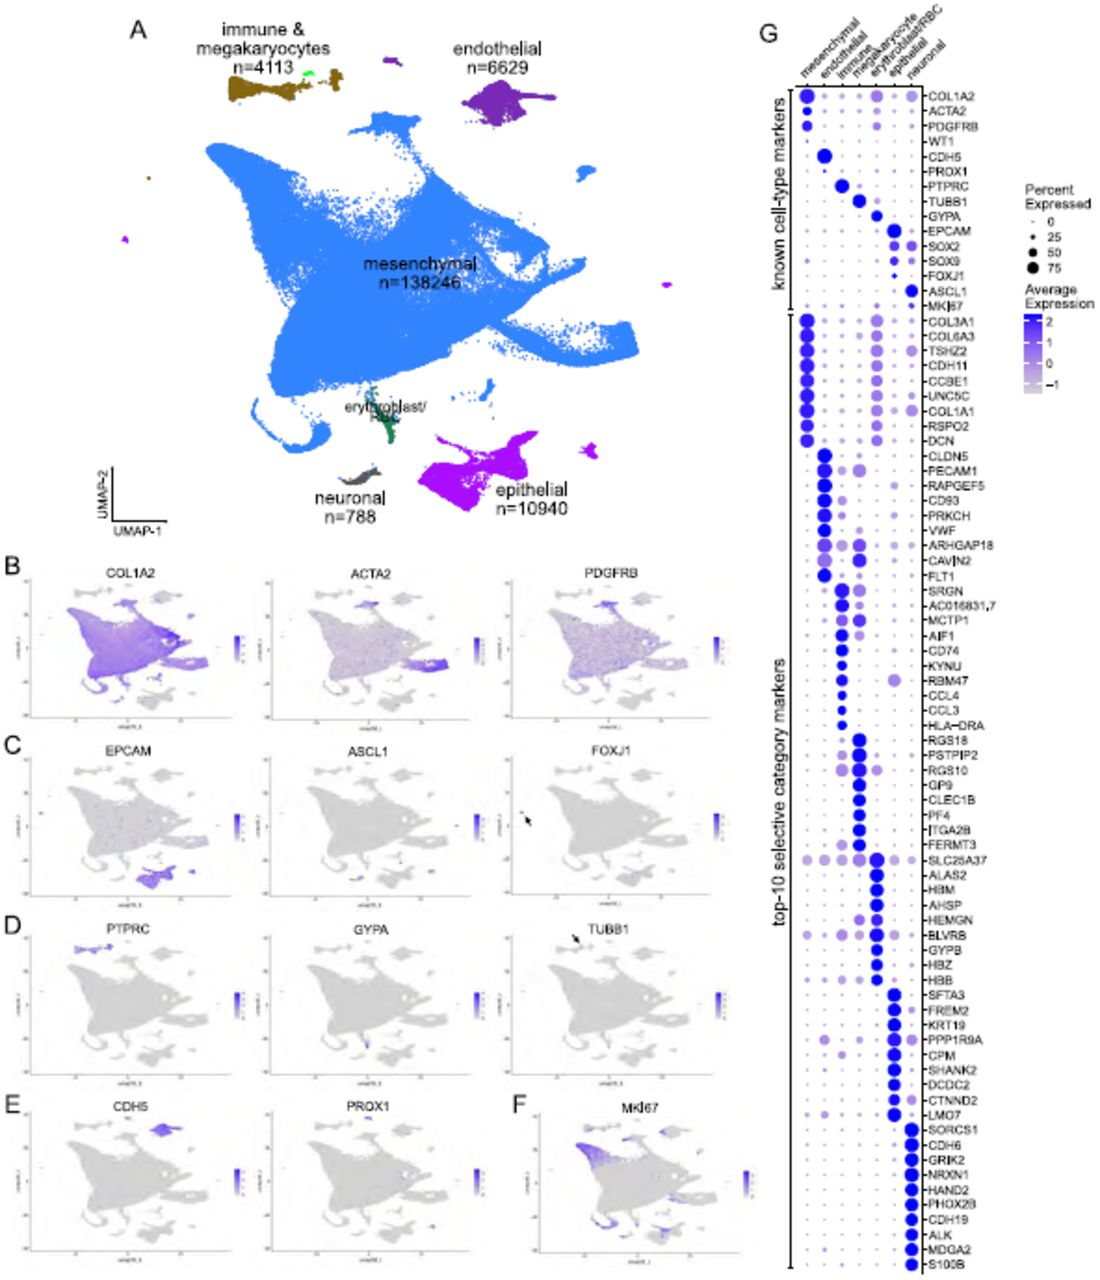

(<matplotlib.collections.PathCollection at 0x7f258fb7a460>, None, None)

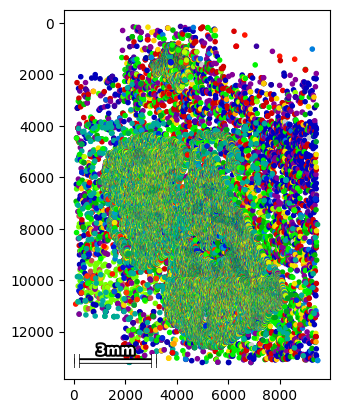

In [9]:
sdata.scatter()

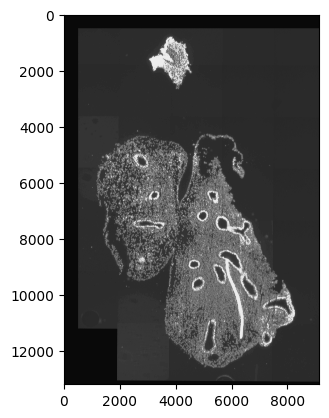

# Supervised analysis:

In [8]:
# 'cheat-create' an anndata set:

pci = pd.read_csv('/home/sebastian/Downloads/S2T1_pcw6_complex_celltypes_formatted.csv',index_col=0)
import anndata

cts = pci['cell type'].unique()
cts = [c[:-1] if c[-1]==' ' else c for c in cts]
cts = sorted(pd.Series([c[:-2] if c[-1].isdigit() else c for c in cts]).unique())
# cts

signatures = pd.DataFrame(columns=cts,index=pci.columns[78:])


for c in cts:
    kewl = pci[pci['cell type'].str.contains(c)]
    signatures[c] = kewl.iloc[:,78:].mean(0)
    

adata = anndata.AnnData(signatures.T)
adata.X = np.array(np.nan_to_num(signatures.T))
adata.obs['celltype'] = adata.obs.index

pl.ScanpyDataFrame(sdata,adata)

/tmp/ipykernel_239791/3053895953.py:19: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(signatures.T)


In [14]:
sdata = pl.SpatialData(
                        coordinates.Gene,
                        coordinates.Global_x_pos*um_p_px,
                        coordinates.Global_y_pos*um_p_px,
#                         pixel_maps={'DAPI':bg_map},
                        scanpy=adata
                        )

sdata = sdata.clean()

In [15]:
signatures = sdata.scanpy.generate_signatures()

signatures[signatures.isna()]=0

signatures

/home/sebastian/src/planktonpy/plankton/plankton.py:101: RuntimeWarning: invalid value encountered in true_divide
  self.signature_matrix = self.signature_matrix / self.signature_matrix.std(


ARIH1    ATP11A      BCL2      BMP5  \
Adventitial fibroblast             2.675679 -0.127429 -0.219334 -0.219334   
Aimmature ASM                      0.785320 -0.311018  0.560430  0.869654   
Airway fibroblast                  1.267024 -0.211620 -0.016188  2.889475   
Airway smooth muscle (ASM)         0.000000  0.000000  0.000000  0.000000   
Arterial                           1.140750 -0.508181 -0.395754  0.541138   
B-cell                            -0.455779 -0.455779 -0.455779  1.511513   
Bronchial endothelial              1.868349 -0.210379 -0.231166  1.411029   
CTGFhigh distal epithelial         0.677575  0.677575 -0.083685  0.373071   
Capillary                          0.205469 -0.087169 -0.331033  0.059150   
Chondroblast                       2.059299 -0.081509 -0.194183  1.383254   
Ciliated epithelial               -0.519071  0.152388 -0.519071 -0.519071   
Conventional dendritic             2.671495 -0.467512 -0.075136  1.101992   
Dendritic                         -0.325396 -0.325396 -0.325396 -0.325396   
Epithelial intermediate           -0.376096 -0.376096 -0.376096  5.611112   
Erythrocyte                        3.355311  1.125816 -0.657780  2.909412   
IL                                 2.339461  0.076243  0.642048  0.076243   
Immature ASM                       1.236868 -0.226943 -0.022009  2.144431   
Immature advenstitial fibroblast   2.726906 -0.548169  0.106846  1.853553   
Immature airway fibroblast         1.443047 -0.323844 -0.018969  3.805831   
Immature arterial                  0.215961 -0.299041 -0.106937  0.514336   
Immature endothelial               0.854285 -0.403975 -0.258791 -0.065213   
Immature macrophage                3.030655 -0.488470  0.014262 -0.488470   
Immature mesenchymal               2.257998 -0.294024  0.018469  5.070429   
Immature monocyte                 -0.511939 -0.511939 -0.511939  1.535818   
Immature venous                    1.314593 -0.294362 -0.383749  0.808070   
Lymphatic endothelial              1.325135  0.102600  0.306356  0.306356   
Lymphoid progenitor                0.666687  0.381830 -0.472742 -0.187885   
Macrophage                         2.107874  0.184183  0.271624  1.408350   
Megakaryocyte                      2.228216  0.002059 -0.385098  0.098849   
Mesothelial                        2.416850 -0.003592 -0.189780  0.324099   
Migrating dendritic                0.595864  0.595864 -0.428731 -0.428731   
Monocyte                           2.973884 -0.353182 -0.138533  2.759235   
Myeloid progenitor                 6.504615 -0.508007 -0.508007  0.493797   
NE progenitor                      0.654101  0.062894  0.062894  1.836514   
Neuroendocrine                    -0.256401  0.107551 -0.013766  2.048627   
Neuronal                           0.194583  0.778332  0.194583 -0.194583   
Neutrophil                         1.810347 -0.510189  0.263323 -0.510189   
Pericyte                           0.974663 -0.300600 -0.152536  1.648116   
Proliferating endothelial          0.391609 -0.299571 -0.221990  0.500928   
Proliferating epithelial           0.628932  0.050257 -0.316306  2.276406   
Proliferating mes.                 1.825604 -0.162491  0.344245  3.080621   
Proliferating myeloid             -0.511331  3.022870 -0.511331  0.902349   
Proliferating smooth muscle        0.696149 -0.440866  0.904526  1.695001   
Proximal progenitor                2.168933  0.007664 -0.127415  3.924963   
Proximal secretory                 0.355871 -0.326240 -0.326240  2.615362   
SFTPChigh distal                   1.313702  1.405583 -0.248274  0.532714   
SOX9high ETV5medium distal epith.  1.398469  1.951581 -0.260865  0.568802   
Venous                             1.556344 -0.403857 -0.151831  2.676458   

                                      CCBE1     CCL21      CD36      CD74  \
Adventitial fibroblast             0.791623 -0.632907 -0.403144 -0.586955   
Aimmature ASM                     -0.029906 -0.535908 -0.170462 -0.311018   
Airway fibroblast                

In [72]:
from scipy.ndimage import gaussian_filter, maximum_filter


n_bins = np.array(sdata.spatial.shape)

vf = (gaussian_filter(np.histogram2d(*sdata.coordinates.T,bins=n_bins)[0],2))

In [115]:
plt.figure(figsize=(15,15))
localmaxs=np.where((maximum_filter(vf,3)==vf)&(vf>0.2))

<Figure size 1080x1080 with 0 Axes>

In [120]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=150)
knn.fit(sdata.coordinates)
dists,nbrs=knn.kneighbors(np.array(localmaxs).T)
neighbor_types = np.array(sdata.gene_ids)[nbrs]

In [124]:
counts = np.zeros((dists.shape[0], len(sdata.genes)))

# if kernel is None:
bandwidth=2
def kernel(x): return np.exp(-x**2/(2*bandwidth**2))

for i in range(0, dists.shape[1]):
    counts[np.arange(dists.shape[0]), neighbor_types[:, i]
           ] += kernel(dists[:, i])

assert (all(counts.sum(1)) > 0)
# counts[np.arange(len(sdata)),
#        self.sdata.gene_ids] += regularization-1

# return counts

In [ ]:


ig.Graph.TupleList(counts)

In [147]:
import igraph as ig
import leidenalg


# leidenalg.find_partition(counts,partition_type=)

/home/sebastian/anaconda3/envs/plankton-dev/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


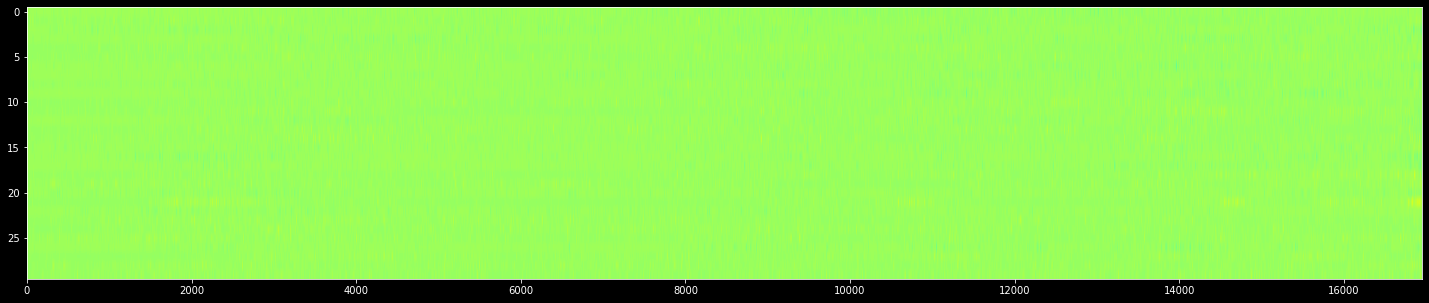

In [161]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=30)
facs = ica.fit_transform(counts)

figure(25,5)
plt.imshow(facs.T,aspect='auto',cmap='jet')

In [243]:
counts/=counts.sum(1).shape

In [271]:
from sklearn.cluster import KMeans, AgglomerativeClustering

# km = KMeans(
#         n_clusters=20,
#         max_iter=100,
#         n_init=1,)

ac = AgglomerativeClustering(n_clusters=8,affinity='euclidean')
classes = ac.fit_predict(counts[:])
# classes = km.fit_predict(counts[:])

# opt =  OPTICS()

# classes = opt.fit_predict(km.cluster_centers_)

In [275]:
ac.

{'affinity': 'euclidean',
 'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'n_clusters': 8}

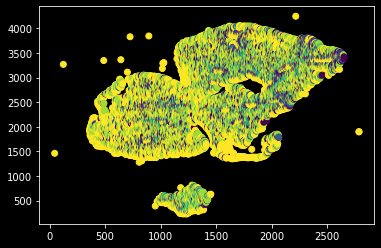

In [274]:
plt.scatter(localmaxs[0], localmaxs[1], c=classes)

In [215]:
from sklearn.decomposition import PCA

pca=PCA(n_components=counts.shape[1])
facs = pca.fit_transform(counts.T)

In [261]:
signatures.shape

(2000,)

In [9]:
from plankton.utils import localmax_sampling

signatures = localmax_sampling(sdata,n_clusters=10,bandwidth=4)

/home/sebastian/anaconda3/envs/plankton-dev/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


In [10]:
from plankton.utils import ssam

ctmap = ssam(sdata,signatures=signatures,kernel_bandwidth=4,patch_length=1000,threshold_cor=0.2,threshold_exp=0.1)

[21, 1021, 2021, 3021, 3081] [43, 1043, 2043, 3043, 4043, 4292]


  0%|          | 0/20 [00:00<?, ?it/s]

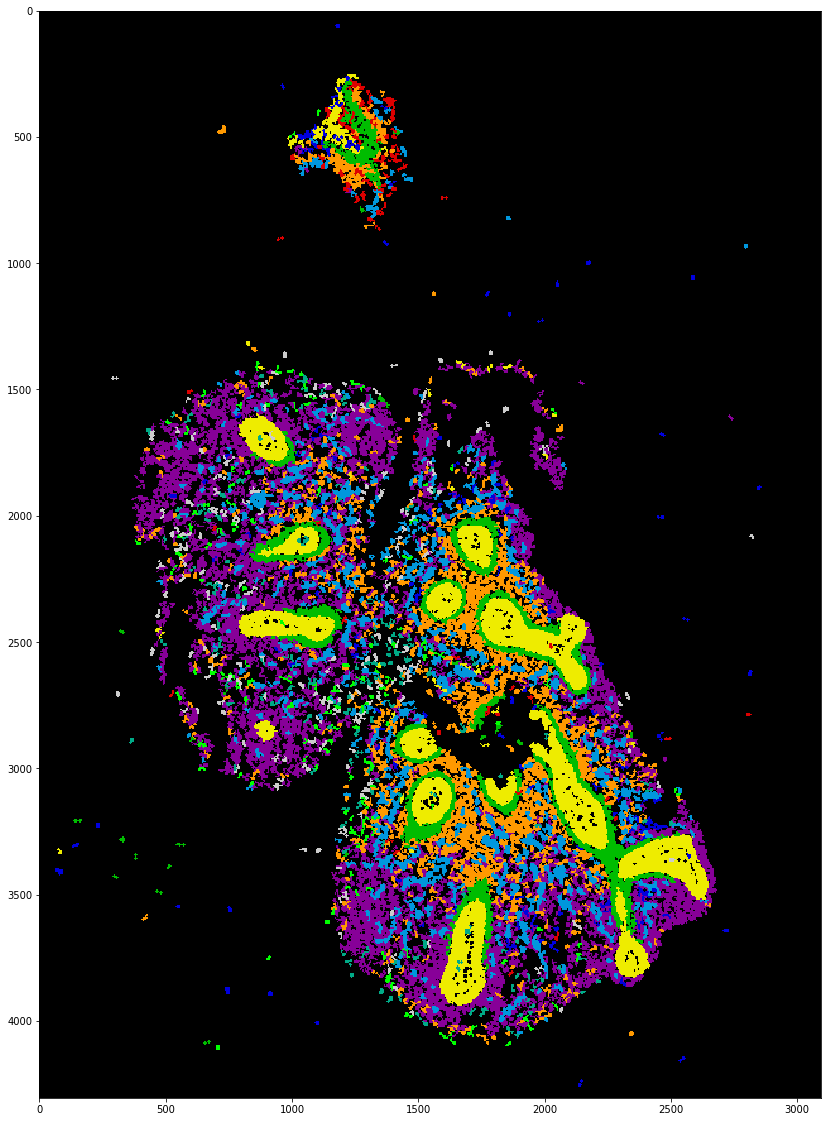

In [11]:
figure(15,20)
ctmap.imshow(cmap='nipy_spectral',interpolation='none')

[319 319 315 ... 734 853 853]


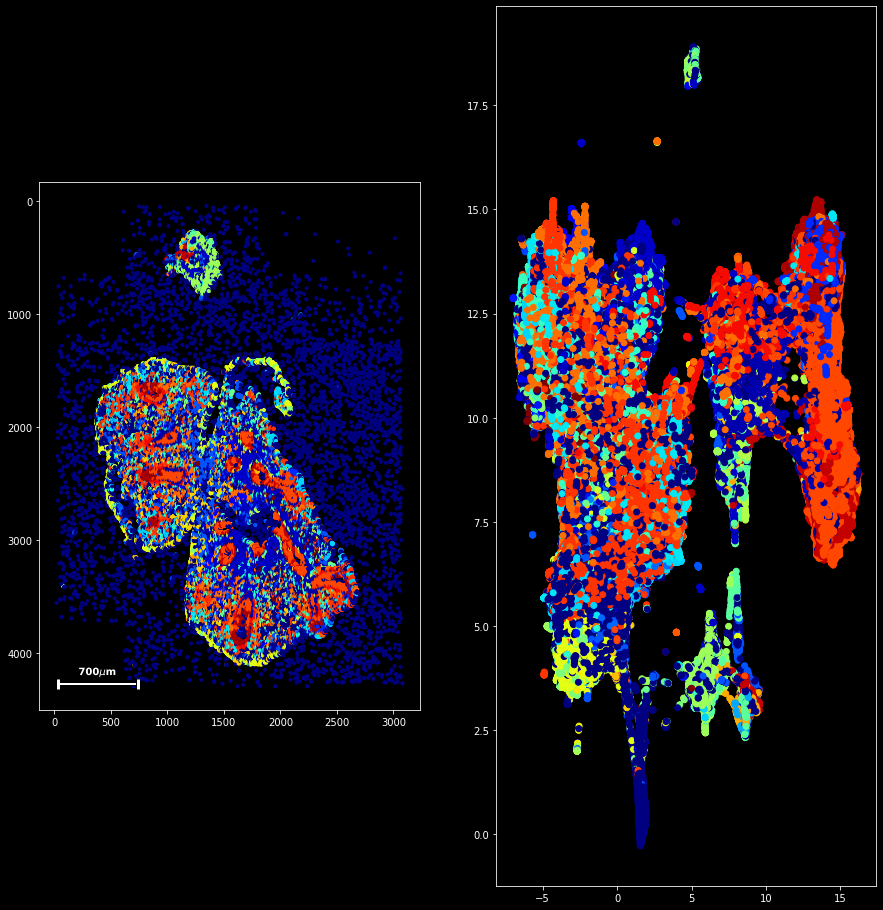

In [31]:
figure(15,25)
ct = ctmap.get_value(sdata.x,sdata.y)

sdata.graph.map_and_umap(c=ct)
# ct